# Signals and Systems for Dummies, Chapter 11

In [55]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting, discrete_time, tonegen
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)
reload(discrete_time)
reload(tonegen)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


## Decaying exponential

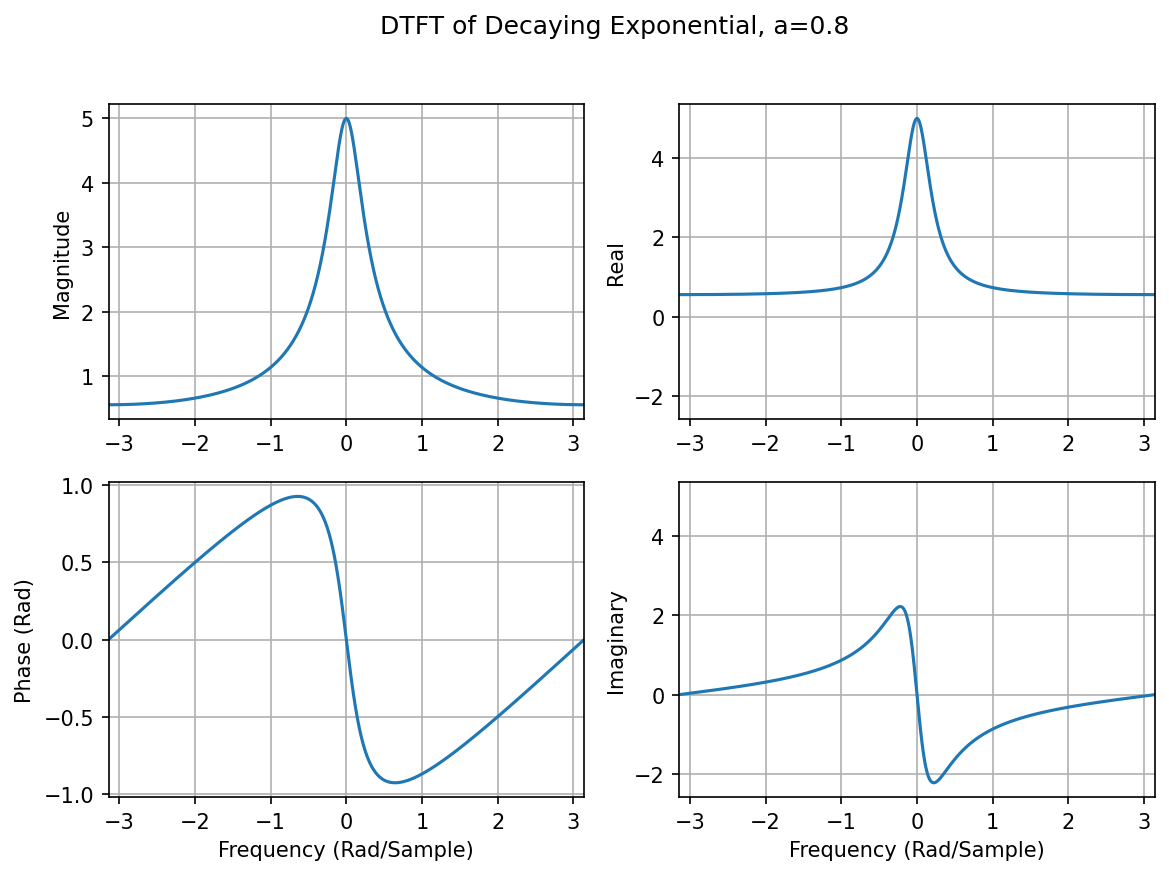

In [35]:
# First-order LPF/decaying exponential
a = 0.8
bk = 1
ak = [1, -a]

_ = plotting.plot_freqz(bk, ak, title=f"DTFT of Decaying Exponential, a={a}")

## Rectangular window

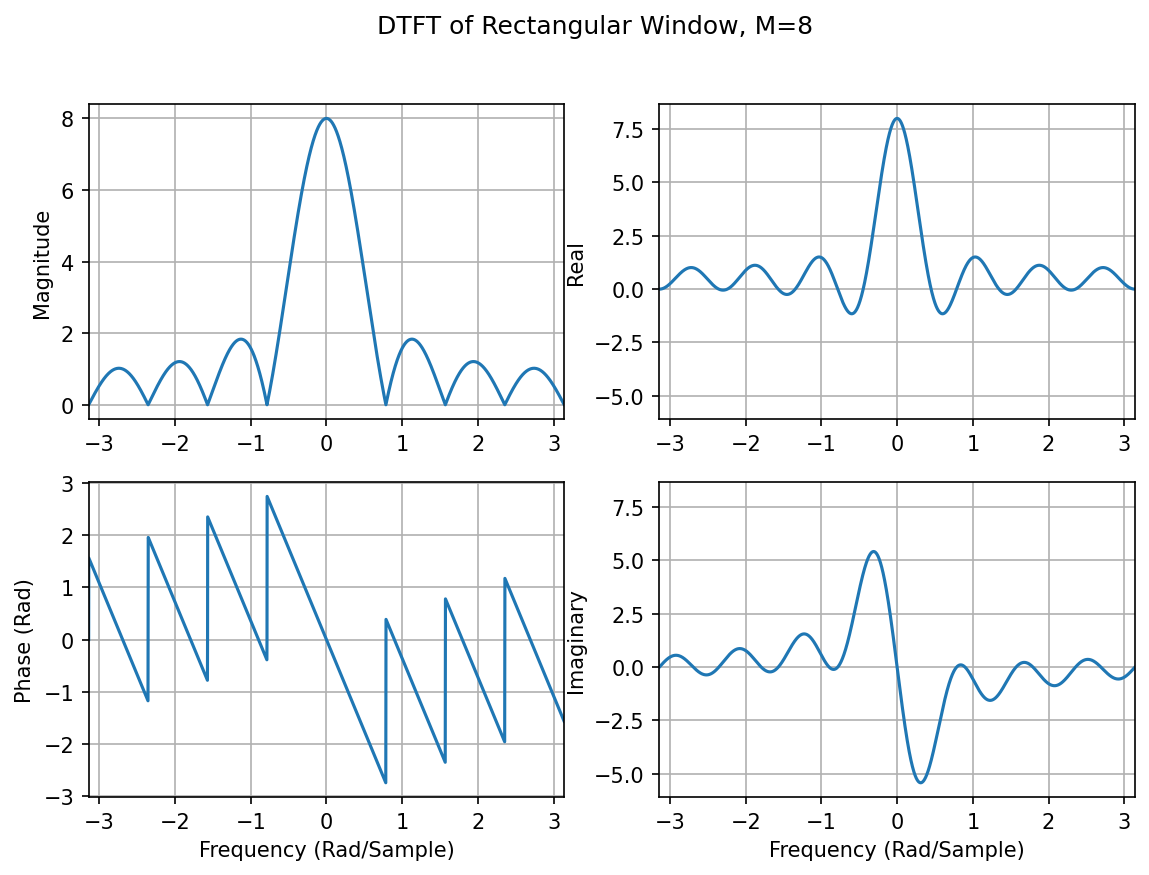

In [12]:
M = 8
bk = np.ones(M)
ak = 1
title = f"DTFT of Rectangular Window, M={M}"
_ = plotting.plot_freqz(bk, ak, title=title)

## Brickwall LPF using firwin2

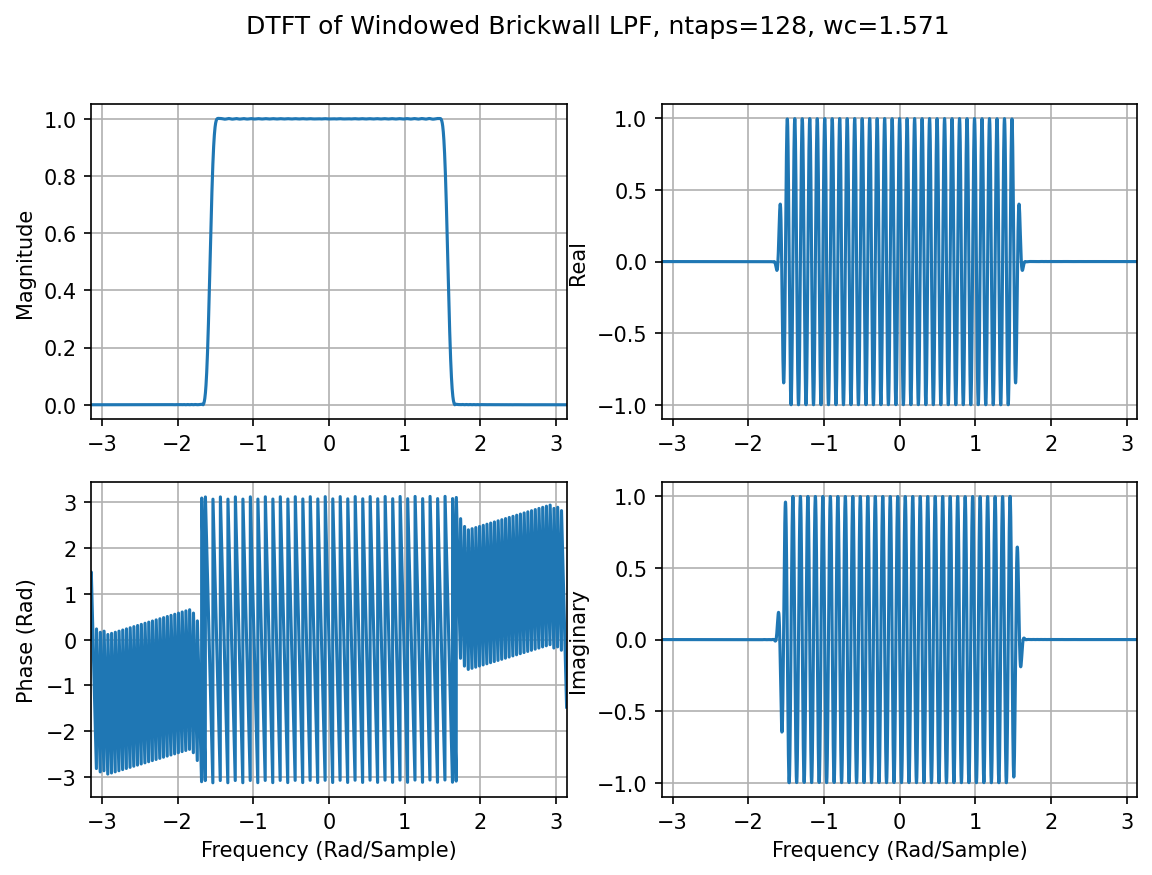

In [13]:
wc = np.pi/2
ntaps = 2**7
bk = signal.firwin2(ntaps, [0, wc/np.pi, wc/np.pi, 1], [1, 1, 0, 0])
ak = 1

title = f"DTFT of Windowed Brickwall LPF, ntaps={ntaps}, wc={round(wc,3)}"

_ = plotting.plot_freqz(bk, ak, title=title)

## Brickwall LPF without windowing

/tmp/ipykernel_158208/1033231059.py:6: RuntimeWarning: invalid value encountered in divide
  bk = np.sin(wc*n)/np.pi/n


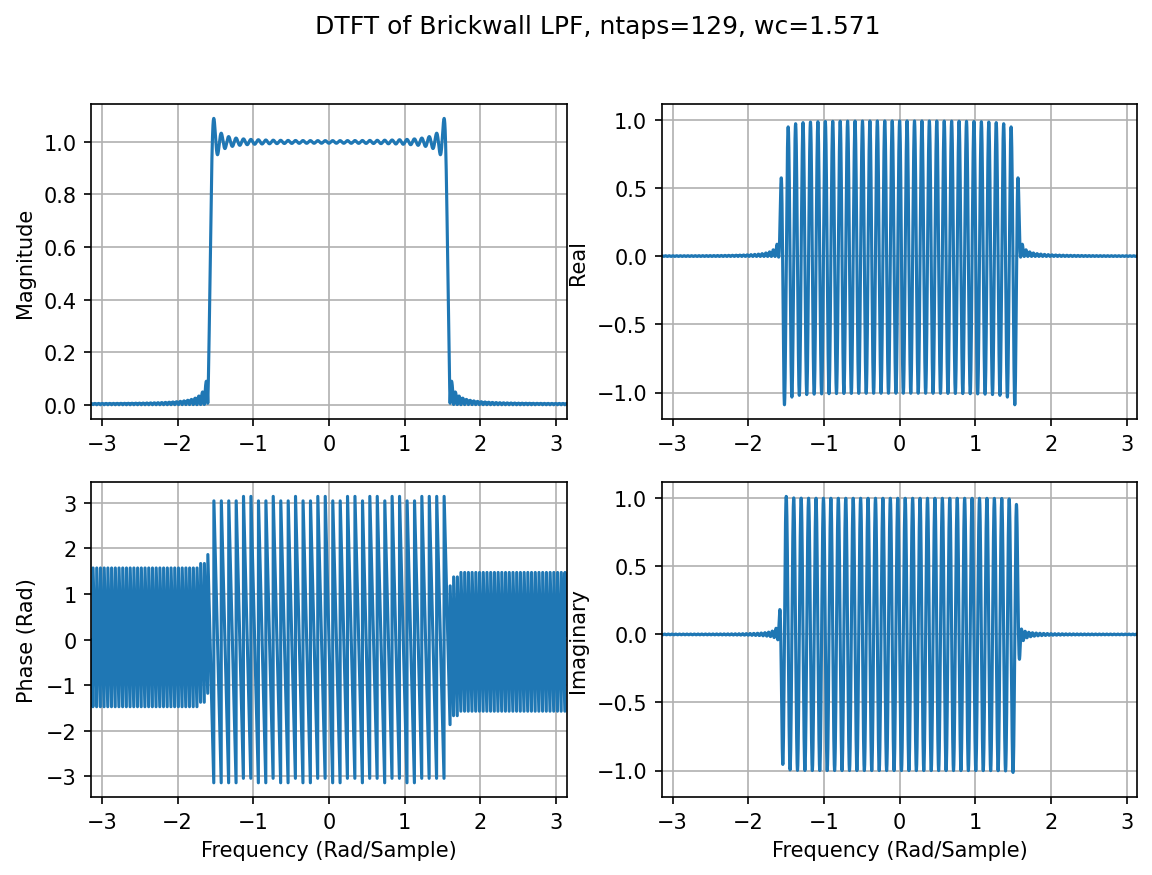

In [14]:
wc = np.pi/2
ntaps = 2**7

ntaps = ntaps + 1 if not (ntaps % 2) else ntaps
n = np.arange(-np.floor(ntaps/2), np.floor(ntaps/2))
bk = np.sin(wc*n)/np.pi/n
bk[n == 0] = wc/np.pi
ak = 1
title = f"DTFT of Brickwall LPF, ntaps={ntaps}, wc={round(wc,3)}"

_ = plotting.plot_freqz(bk, ak, title=title)

### Gibbs phenomenon

/tmp/ipykernel_158208/998059260.py:8: RuntimeWarning: invalid value encountered in divide
  b = np.sin(wc*n)/np.pi/n


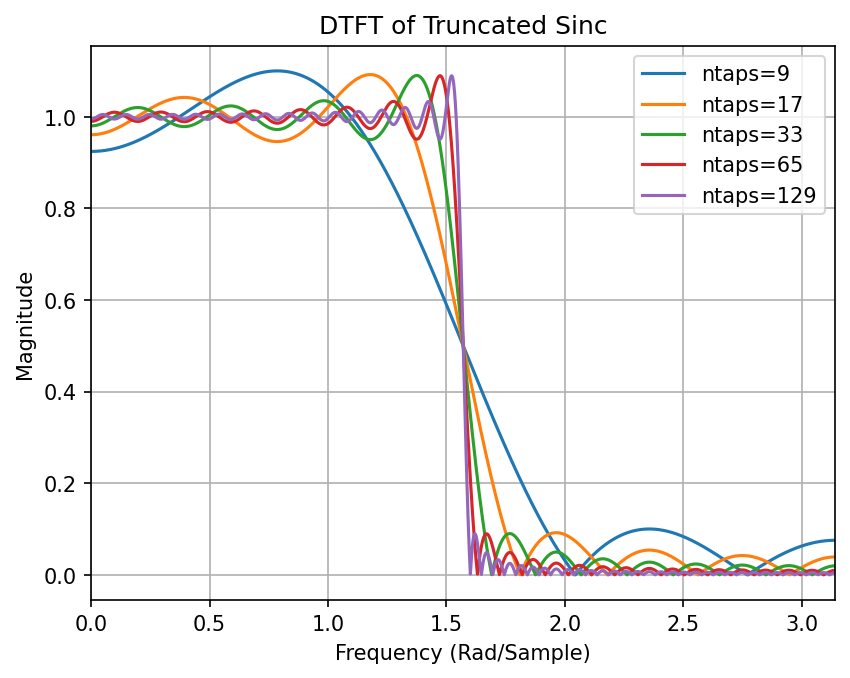

In [58]:
wc = np.pi/2

bk = []
labels = []
for ntaps in np.pow(2, np.arange(3, 8)):
    ntaps = ntaps + 1 if not (ntaps % 2) else ntaps
    n = np.arange(-np.floor(ntaps/2), np.floor(ntaps/2)+1)
    b = np.sin(wc*n)/np.pi/n
    b[n == 0] = wc/np.pi
    bk.append(b)
    labels.append(f"ntaps={len(b)}")

ak = [1]*len(bk)
title = "DTFT of Truncated Sinc"

fig, axs = plotting.compare_freqz(bk, ak, labels=labels, title=title, whole=[False]*len(bk), yscale="linear")
# axs.set_ylim(bottom=-45)

## Tones

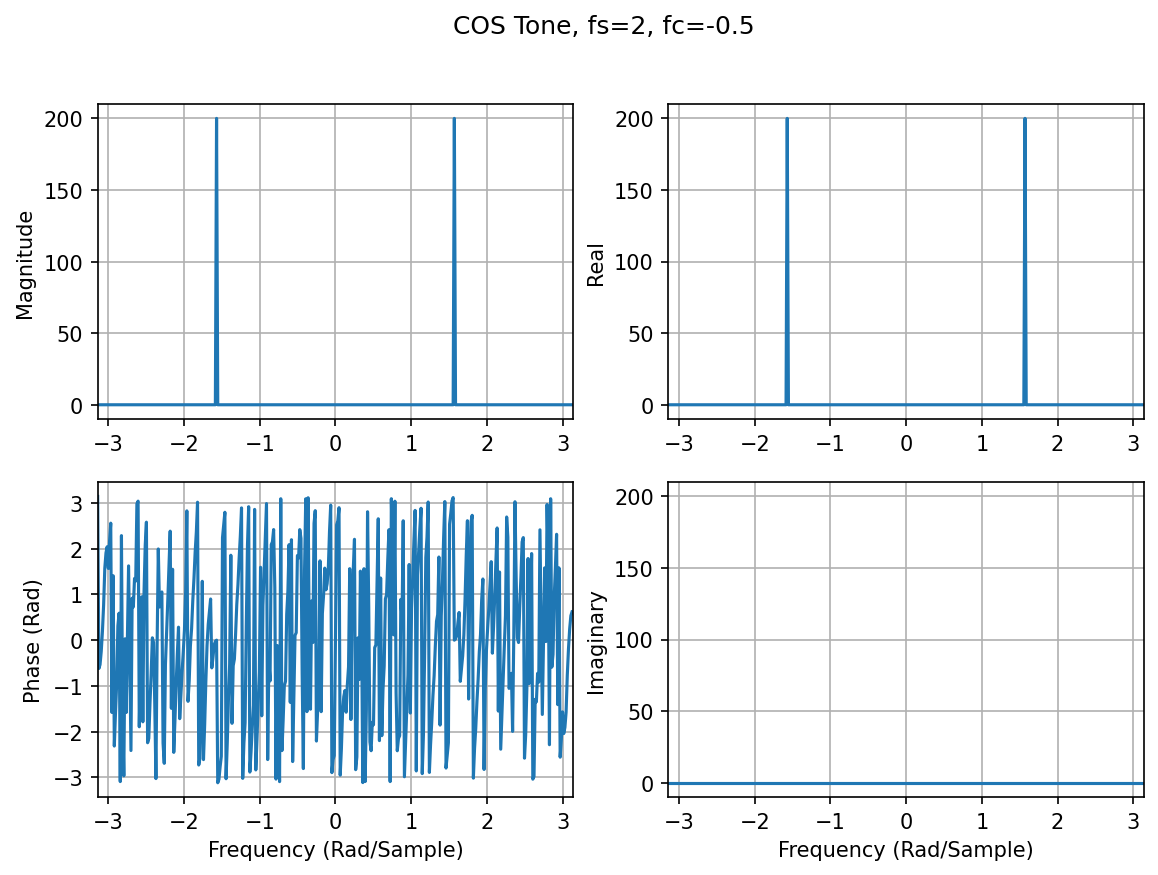

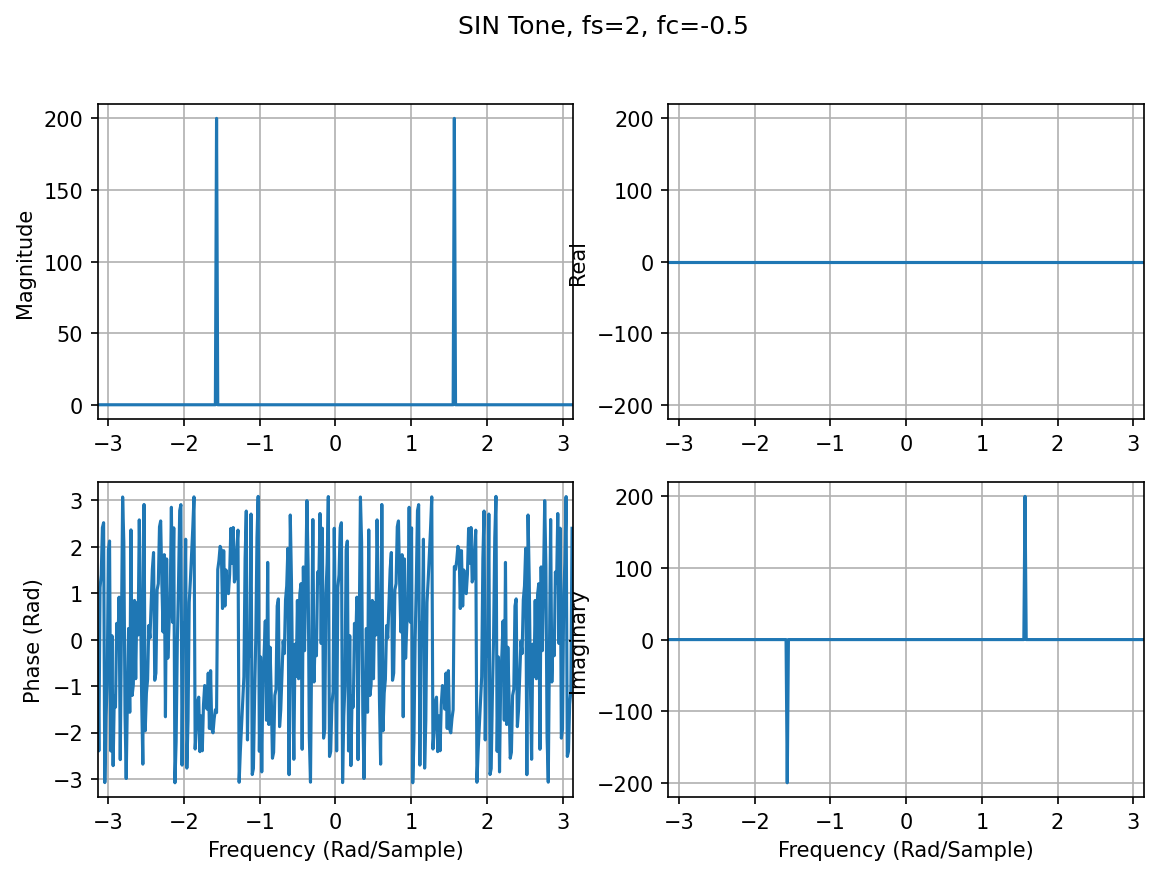

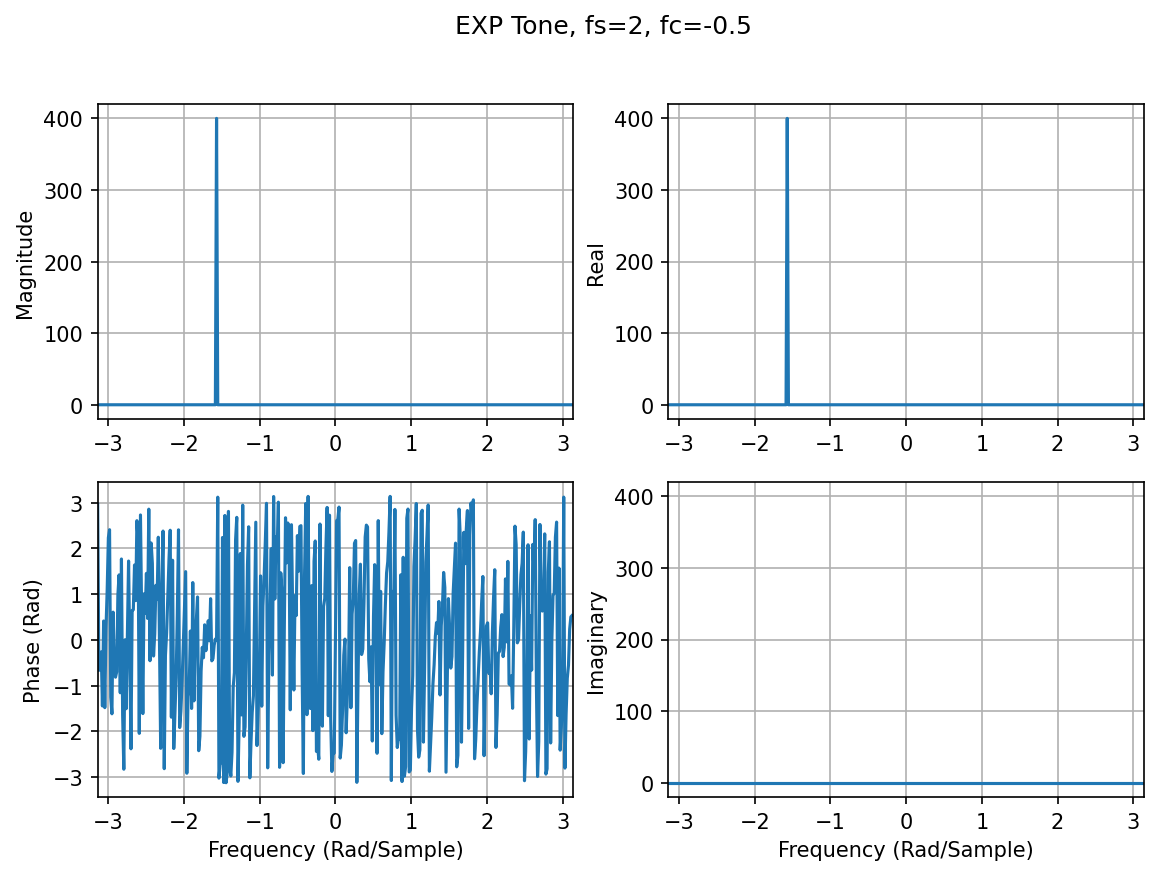

In [19]:
fs = 2
fc = -0.5
ak = 1

for opt in ["cos", "sin", "exp"]:
    bk = tonegen.tonegen(fs, fc, cossin=opt)
    title = f"{opt.upper()} Tone, fs={fs}, fc={fc}"
    _ = plotting.plot_freqz(bk, ak, worN=len(bk), title=title)

## Downsample

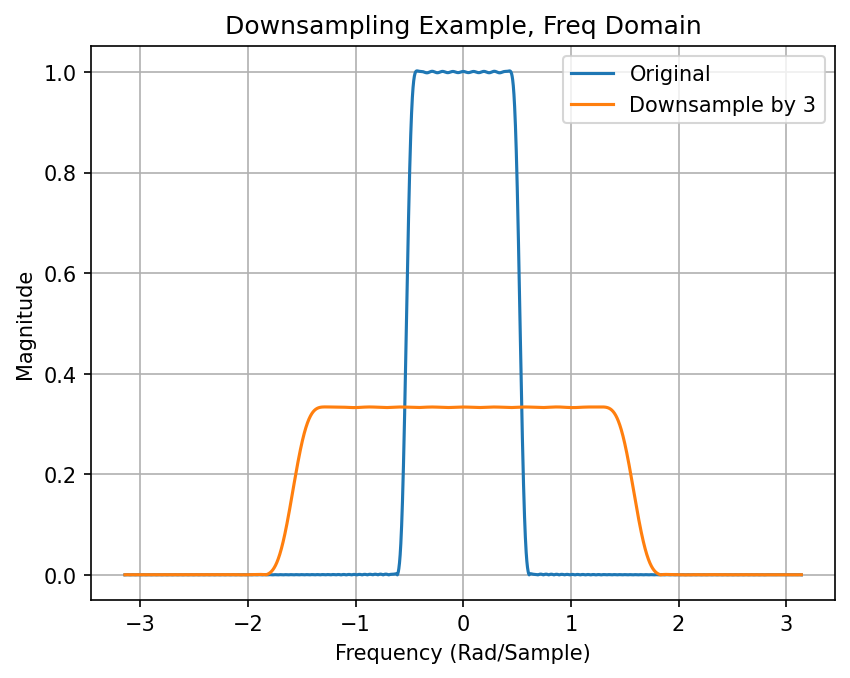

In [ ]:
M = 3
wc = np.pi/(2*M)
ntaps = 2**7
bk = signal.firwin2(ntaps, [0, wc/np.pi, wc/np.pi, 1], [1, 1, 0, 0])
ak = 1
title = "Downsampling Example, Freq Domain"

_ = plotting.compare_freqz([bk, discrete_time.downsample(bk, M)], [1, 1], 
                           labels=["Original", f"Downsample by {M}"],
                           title=title)

## Upsample

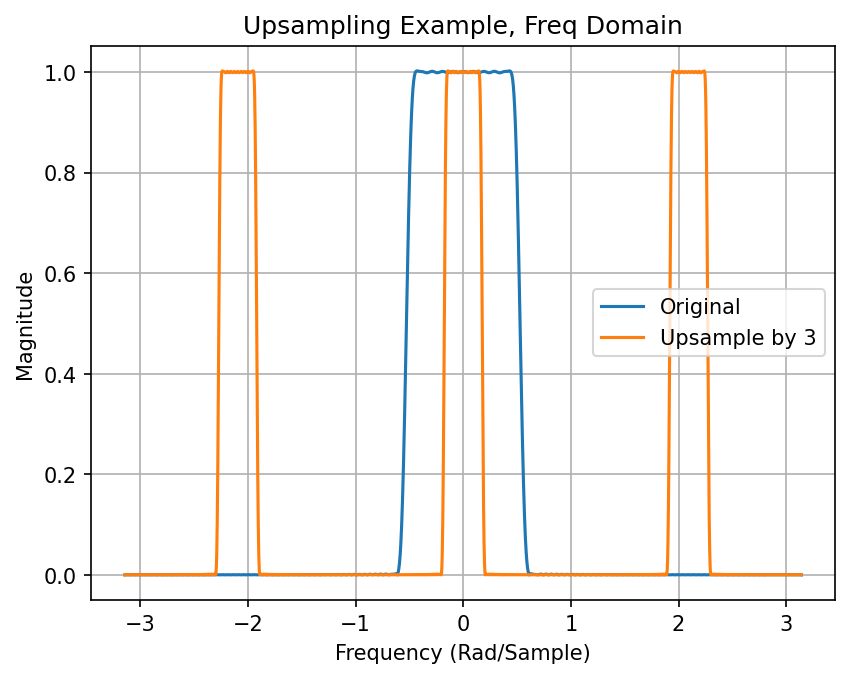

In [34]:
M = 3
wc = np.pi/(2*M)
ntaps = 2**7
bk = signal.firwin2(ntaps, [0, wc/np.pi, wc/np.pi, 1], [1, 1, 0, 0])
ak = 1
title = "Upsampling Example, Freq Domain"

_ = plotting.compare_freqz([bk, discrete_time.upsample(bk, M)], [1, 1], 
                           labels=["Original", f"Upsample by {M}"],
                           title=title)